In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Q1. Problem Statement: Sampling Distribution-I
# A wine can be labeled as quality "7" and above only if the alcohol level is greater
# than 11.3%. If the level of alcohol is high, then the will taste sour enough; if the
# alcohol level is less than 11.3%, the wine might taste bitter. The quality control
# person is only allowed to open ten bottles from a batch of wine with quality "7"
# & "8" to ensure the levels are sufficient.
# Load the “winequality-red.csv” data into a DataFrame and [erform following
# tasks:
# 1. Pick up a sample of ten bottles from "7" and "8" quality using
# numpy.random() function
# 2. Find out the mean and standard deviation of the sample
# 3. Plot the alcohol content available in the sample using a distplot
# 4. Calculate the standard error using formula - standard_error =
# s/np.sqrt(n), Where,s = standard deviation of the sample, and n =
# sample size


In [7]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
# 1. Pick up a sample of ten bottles from "7" and "8" quality using numpy.random() function

quality_7_8 = df[(df['quality'] == 7) | (df['quality'] == 8)]
quality_7_8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [53]:
sample_7_8 = quality_7_8['alcohol'].sample(10, random_state = 1)
sample_7_8

648     11.2
366     10.0
369     12.0
503     10.9
875     11.8
873     11.1
949     11.9
1398    10.2
807     12.8
62       9.5
Name: alcohol, dtype: float64

In [65]:
# 2. Find out the mean and standard deviation of the sample

sample_7_8_mean = sample_7_8.mean()
print(sample_7_8_mean)

sample_7_8_sd = sample_7_8.std()
print(sample_7_8_sd)

11.139999999999999
1.024369724920321


C:\Users\aiden\AppData\Local\Temp\ipykernel_17512\842812009.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_7_8, hist = False)


Text(0.5, 1.0, 'Alcohol content Distribution')

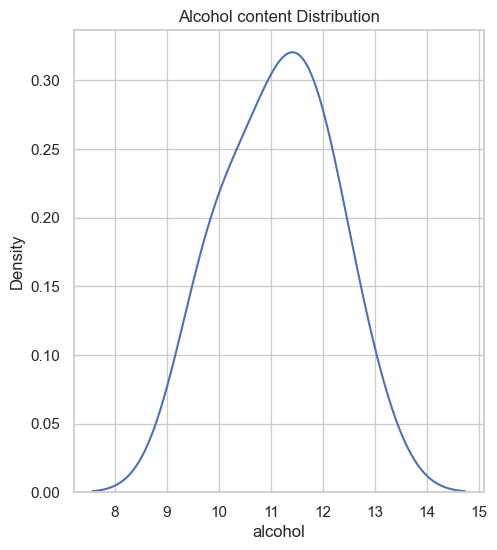

In [61]:
# 3. Plot the alcohol content available in the sample using a distplot
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.distplot(sample_7_8, hist = False)
plt.title('Alcohol content Distribution')

In [69]:
# 4. Calculate the standard error using formula - standard_error = s/np.sqrt(n), Where,s = standard deviation of the sample, and n = sample size

se_quality78_alcohol = sample_7_8_sd/np.sqrt(10)
se_quality78_alcohol

0.32393414968683587

In [ ]:
# Q2. Problem Statement: Sampling Distribution-II
# Note: This problem is in continuation with the previous one.
# Our goal was to get a mean of 11.3, but we got 11.65 for our samples. Since this
# is a sample and we do not expect it to be precisely 11.3, it is 11.65. Does this
# batch of the sample accurately reflect the alcohol content of the entire
# population? To answer these questions, perform the following tasks:
# 1. Take nine samples of size ten each from the population and find the means
# and standard deviations of all the nine samples
# 2. Plot the means of the sampling distribution
# 3. Find the standard error of the sampling distribution


In [169]:
# 1. Take nine samples of size ten each from the population and find the means and standard deviations of all the nine samples
means = list()
sds = list()
for i in range(9):
    sample_al = df["alcohol"].sample(10)
    mean = sample_al.mean()
    means.append(mean)
    sd = sample_al.std()
    sds.append(sd)

print("Means:" ,means)
print("--------------------------------------------------------------------------")
print("SDs:" ,sds)

Means: [10.379999999999999, 10.24, 10.436666666666671, 9.67, 10.31, 10.31, 9.91, 9.68, 10.635]
--------------------------------------------------------------------------
SDs: [0.9101892355133874, 1.2825322174857396, 0.7874713398664844, 1.156671469730662, 1.0608696642116056, 1.2591443302673622, 0.5506561742341786, 0.5902918298980974, 1.213820872744867]


C:\Users\aiden\AppData\Local\Temp\ipykernel_17512\35484087.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(means)


Text(0.5, 1.0, 'Alcohol content Distribution')

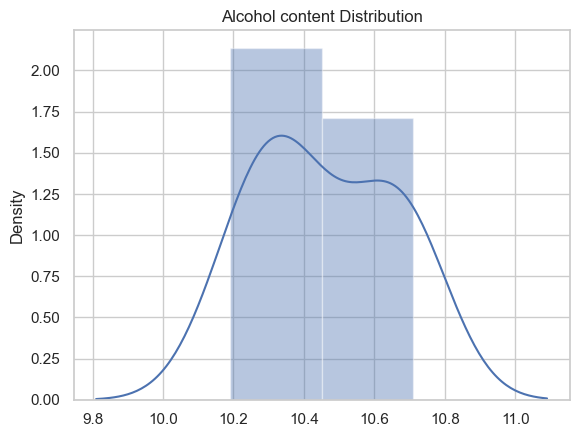

In [145]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(18, 6))
# plt.subplot(1, 3, 1)
sns.distplot(means)
plt.title('Alcohol content Distribution')

In [163]:
# 3. Find the standard error of the sampling distribution
sd_mul = np.std(means)
sd_mul

sample_size = len(means)
sample_size

se = sd_mul/np.sqrt(sample_size)
se

0.04318782506101701